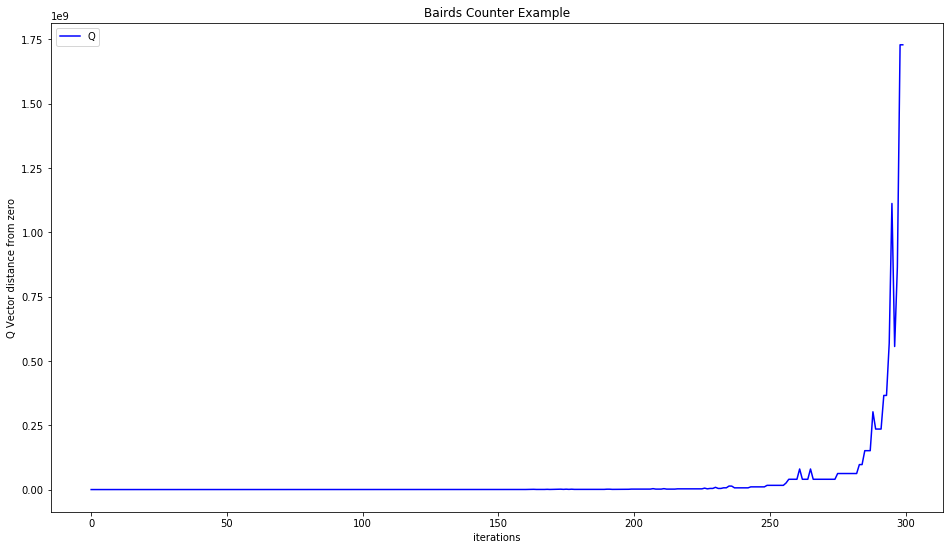

In [4]:
import gym
import numpy as np
import math
"""import matplotlib
matplotlib.use('TkAgg')"""
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random

class Baird:
    def __init__(self, gamma=0.99, states = range(7), max_episodes = 300):
        #self.state = np.random.choice(STATES)
        self.probability = 1.0 / 7
        self.actions = ["solid", "dash"]
        self.gamma = gamma
        self.states = states
        self.alpha = 1.0
        self.beta = 0.1
        self.max_episodes = max_episodes
        self.theta = np.ones(14)
        self.features = np.zeros((14, 14)) # n_states x n_weights (this is the representation of states)
        #print(self.features)
        for i in range(14):
            if i < 6:
                self.features[i, i] = 2*self.theta[i]
                #print(self.features)
                self.features[i, 0] = 1*self.theta[i]
                #print(self.features)
            if i >=6:
                self.features[i,i] = 1*self.theta[i]
        self.features[6,0] = 2*self.theta[6]
        #print(self.features[1])
        #print(self.features)
        #self.theta[-9] = 10
        self.zeros = np.zeros(14)
        #self.theta = np.transpose(self.theta)
        #self.weights[-2] = 10

    def action(self):
        if np.random.binomial(1, self.probability) == 1:
            action = "solid"
        else:
            action = "dash"
        return action
    
    def get_Qfunction(self, state, action):
        # calculate feature from state and action
        #feature = self.get_feature_from_state_action(state, action) #why is this defining the rewards
        #feature is constant but theta is not...
        theta = np.transpose(self.theta)
        #print("t", np.shape(self.theta))
        features = self.features[state]
        #print("f", np.shape(self.features))
        Q = np.multiply(features, theta)
        #print(Q)
        return Q # dot product of the feature space and self.theta
    
    """def featureUpdate(self):
        for i in range(14):
            if i < 6:
                self.features[i, i] = 2*self.theta[i]
                #print(self.features)
                self.features[i, 0] = 1*self.theta[i]
                #print(self.features)
            if i >=6:
                self.features[i,i] = 1*self.theta[i]
        self.features[6,0] = 2*self.theta[6]
        #print(self.features)
        return self.features"""
        
    
    
    def thetaUpdate(self, state, nextState, action, step_size, reward, feature):
        QFunction0 = self.get_Qfunction(state, action)
        QFunction1 = self.get_Qfunction(nextState, action)
        self.theta += (step_size)*(feature)*(reward + self.gamma*QFunction1 - QFunction0)
        #print(np.shape(self.theta))
        return self.theta
        
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size    
    
    def LFAUpdate(self): # max_episodes = 3000, max_steps = 200
        Q_values = []
        T_values = []
        for e in range(self.max_episodes):
            state = random.choice(self.states)
            Qs = 0
            step_size = self.decay_step_size(e) # 0.0860 
            action = self.action()
            if action == "solid":
                nextState = 6
                feature = self.features[state]
            elif action == "dash":
                nextState = np.random.choice(self.states[:6])
                feature = self.features[state+7]
            reward = 0
            #self.thetaUpdate(state, nextState, action, step_size, reward, feature)
            b = self.thetaUpdate(state, nextState, action, step_size, reward, feature)
            a = self.get_Qfunction(state, action)
            state = nextState
            Q_values.append(np.linalg.norm(a - self.zeros))
            T_values.append(np.linalg.norm(b - self.zeros))
        #print(Q_values)
        #print(Q_values)
        #print("t", self.theta)
        #print(self.features)
        return Q_values, T_values
    
    def moving_average(self, Q_values, window_size = 25): #A specified window size determines the size of each subset.
        sum_vec = np.cumsum(np.insert(Q_values, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave

            
        
    
if __name__ == '__main__':
    bce = Baird()
    run, T_values = bce.LFAUpdate()
    move_ave = bce.moving_average(run)
    #print(run)
    fig = plt.figure(figsize=(16,9))
    plt.plot(run, 
        color = 'b', 
        label = 'Q')
    """plt.plot(T_values, 
        color = 'r', 
        label = 'Weights')"""    
    plt.legend(loc ='best')
    plt.title('Bairds Counter Example')
    plt.xlabel('iterations')
    plt.ylabel('Q Vector distance from zero') 
    plt.show()
    """fig = plt.figure(figsize=(14,6))
    ax3 = fig.add_subplot(111)
    ax3.plot(run,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Rewards',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.5)
    ax3.legend(loc='best')

    plt.show()
    #print(run)"""